In [1]:
#Import all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
#Load the dataset
data = pd.read_excel("Shoe Shop.xlsx", skiprows=3, usecols=[i for i in range(14)])
data.head(5)

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Unnamed: 11,Month,SalePrice
0,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [3]:
# Rename unnamed column
df = data.rename(columns={'Unnamed: 11': 'Year'})
df.head(5)

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [4]:
#from here we see we have 14 columns and 14967 rows. This is adequate enough to carry out analysis.
df.shape

(14967, 14)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  int64         
 10  Discount       14967 non-null  float64       
 11  Year           14967 non-null  int64         
 12  Month          14967 non-null  int64         
 13  SalePrice      14967 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.

In [6]:
df.nunique() #shows the number of unique entries of each element per column.

InvoiceNo        13389
Date             12044
Country              4
ProductID           96
Shop                29
Gender               2
Size (US)           19
Size (Europe)       24
Size (UK)           22
UnitPrice            8
Discount             5
Year                 3
Month               12
SalePrice           40
dtype: int64

In [7]:
#Check for missing values
df.isnull().sum()

InvoiceNo        0
Date             0
Country          0
ProductID        0
Shop             0
Gender           0
Size (US)        0
Size (Europe)    0
Size (UK)        0
UnitPrice        0
Discount         0
Year             0
Month            0
SalePrice        0
dtype: int64

In [8]:
df1 = df.drop(['InvoiceNo', 'Date', 'Size (Europe)', 'Size (UK)'], axis=1)
df1.head(3)

,Country,ProductID,Shop,Gender,Size (US),UnitPrice,Discount,Year,Month,SalePrice
0,United Kingdom,2152,UK2,Male,11.0,159,0.0,2014,1,159.0
1,United States,2230,US15,Male,11.5,199,0.2,2014,1,159.2
2,Canada,2160,CAN7,Male,9.5,149,0.2,2014,1,119.2


In [9]:
df2 = df1.copy()

### <b>Visualisation<b>

Most sold pairs based on Gender

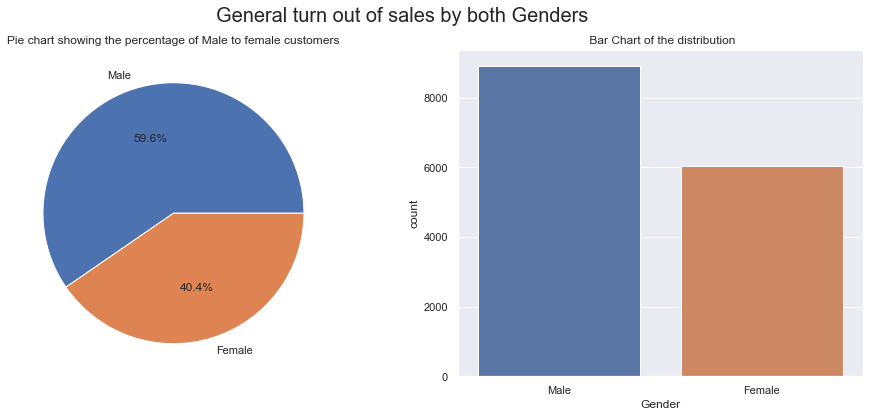

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('General turn out of sales by both Genders', fontsize=20)

#Pie chart
ax1.pie(df2['Gender'].value_counts(), labels = df2['Gender'].value_counts().index, autopct='%1.1f%%')
ax1.title.set_text('Pie chart showing the percentage of Male to female customers')
#Bar chart
sns.countplot(x=df2['Gender'], data=df2, ax=ax2)
ax2.title.set_text(' Bar Chart of the distribution')

Men shoes seem to have been purchased more than women shoes across all stores owned by the shoe company. 59.6% of all sales made by the company seem to have come from Men shoes. And just about 6000 female shoes were sold which seems like a good performance in general.

In [11]:
#Group the datasets based on the different countries
us = df2.groupby('Country').get_group('United States')
ger = df2.groupby('Country').get_group('Germany')
can = df2.groupby('Country').get_group('Canada')
uk = df2.groupby('Country').get_group('United Kingdom')

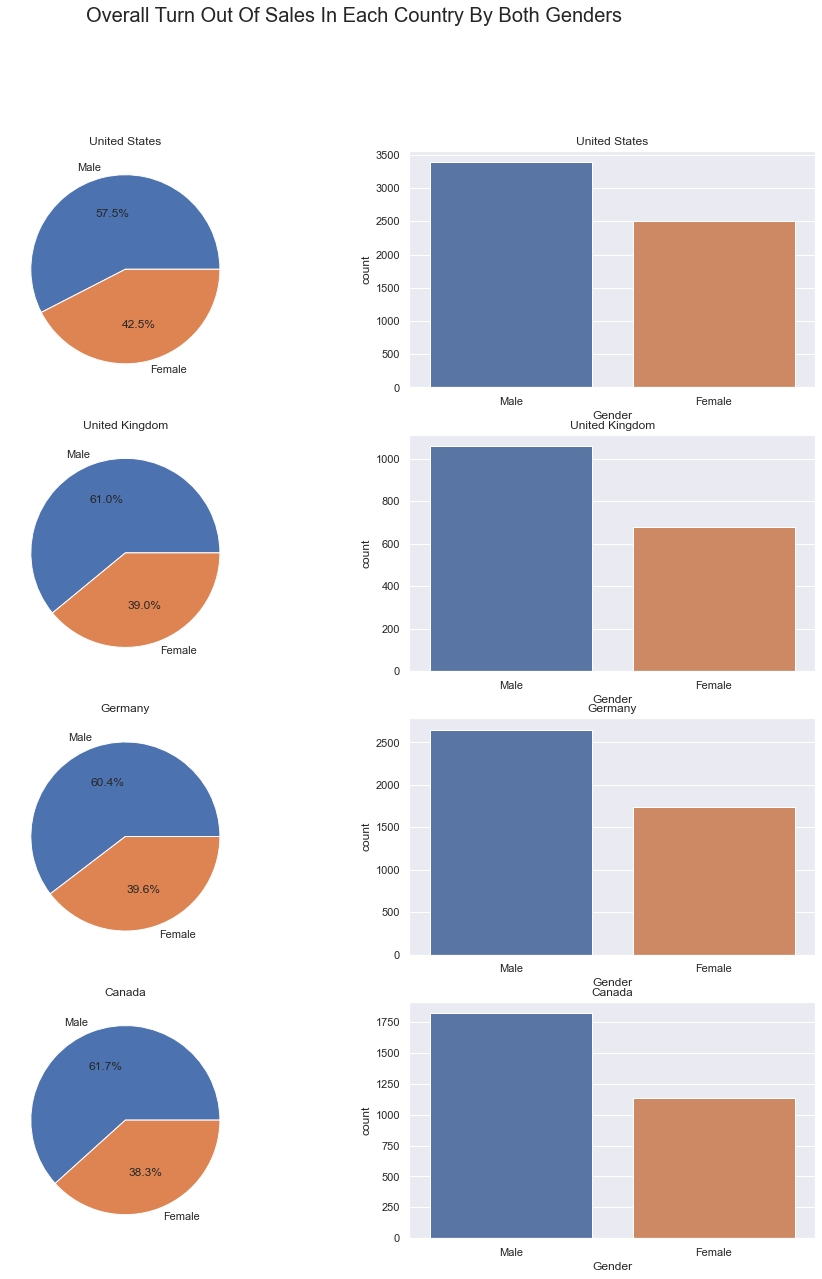

In [12]:
#Create plots to show the relationships of how sales went in each country based on gender
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Overall Turn Out Of Sales In Each Country By Both Genders', fontsize=20)
order = ['Male', 'Female']
#Pie chart
ax1.pie(us['Gender'].value_counts(), labels = us['Gender'].value_counts().index, autopct='%1.1f%%')
ax1.title.set_text('United States')
#Bar chart
sns.countplot(x=us['Gender'], data=us, order=order, ax=ax2)
ax2.title.set_text('United States')
#Pie chart
ax3.pie(uk['Gender'].value_counts(), labels = uk['Gender'].value_counts().index, autopct='%1.1f%%')
ax3.title.set_text('United Kingdom')
#Bar chart
sns.countplot(x=uk['Gender'], data=uk, order=order, ax=ax4)
ax4.title.set_text('United Kingdom')
#Pie chart
ax5.pie(ger['Gender'].value_counts(), labels = ger['Gender'].value_counts().index, autopct='%1.1f%%')
ax5.title.set_text('Germany')
#Bar chart
sns.countplot(x=ger['Gender'], data=ger, order=order, ax=ax6)
ax6.title.set_text('Germany')
#Pie chart
ax7.pie(can['Gender'].value_counts(), labels = can['Gender'].value_counts().index, autopct='%1.1f%%')
ax7.title.set_text('Canada')
#Bar chart
sns.countplot(x=can['Gender'], data=can, order=order, ax=ax8)
ax8.title.set_text('Canada')

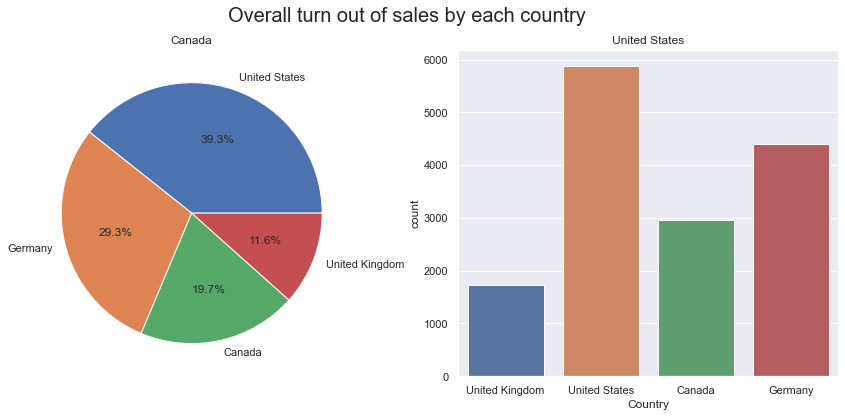

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Overall turn out of sales by each country', fontsize=20)

ax1.pie(df2['Country'].value_counts(), labels = df2['Country'].value_counts().index, autopct='%1.1f%%')
ax1.title.set_text('Canada')

sns.countplot(x=df2['Country'], data=df2, ax=ax2)
ax2.title.set_text('United States')
plt.show()

In [14]:
#Create  a new date column which only takes int consideration the month and the year
df2['DATE'] = pd.to_datetime(df2[['Year', 'Month']].assign(DAY=1))

#### Sales Trend

In [15]:
#Sum up the total sales made in each month for the 3years period.
df2.groupby('DATE').SalePrice.sum().sort_values(ascending=False)

DATE
2016-07-01    106401.6
2016-08-01    100626.4
2016-10-01    100515.6
2016-09-01     99273.1
2016-06-01     99198.3
2016-05-01     89494.7
2016-04-01     87906.0
2016-02-01     77819.6
2016-01-01     76934.8
2016-03-01     75594.5
2016-11-01     74404.0
2015-10-01     69210.8
2015-06-01     68702.4
2015-12-01     67147.1
2016-12-01     66119.7
2015-07-01     65063.6
2015-08-01     64756.5
2015-11-01     64551.4
2015-09-01     63987.7
2015-05-01     56984.6
2015-03-01     48236.6
2015-04-01     46623.7
2015-01-01     44805.7
2015-02-01     44144.1
2014-10-01     39658.4
2014-04-01     36798.0
2014-09-01     35562.4
2014-05-01     34208.8
2014-08-01     33944.3
2014-06-01     33148.4
2014-03-01     33117.0
2014-07-01     31597.8
2014-12-01     31255.6
2014-01-01     31252.3
2014-02-01     29612.5
2014-11-01     26409.1
Name: SalePrice, dtype: float64

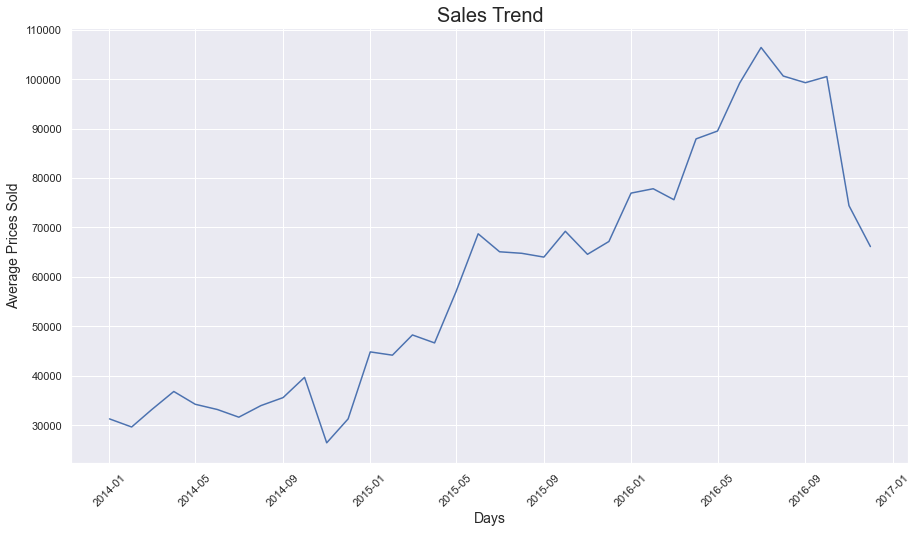

In [16]:
#Create a sales trend showing how each store performed over the three years period.
plt.figure(figsize=(15,8))
plt.plot(df2.groupby('DATE').SalePrice.sum())
plt.xlabel('Days',fontsize=14)
plt.ylabel('Average Prices Sold',fontsize=14)
plt.title('Sales Trend',fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [17]:
#Divide the three year period into individual years and see the sales performance for each year
four = df2.groupby('Year').get_group(2014)
five = df2.groupby('Year').get_group(2015)
six = df2.groupby('Year').get_group(2016)

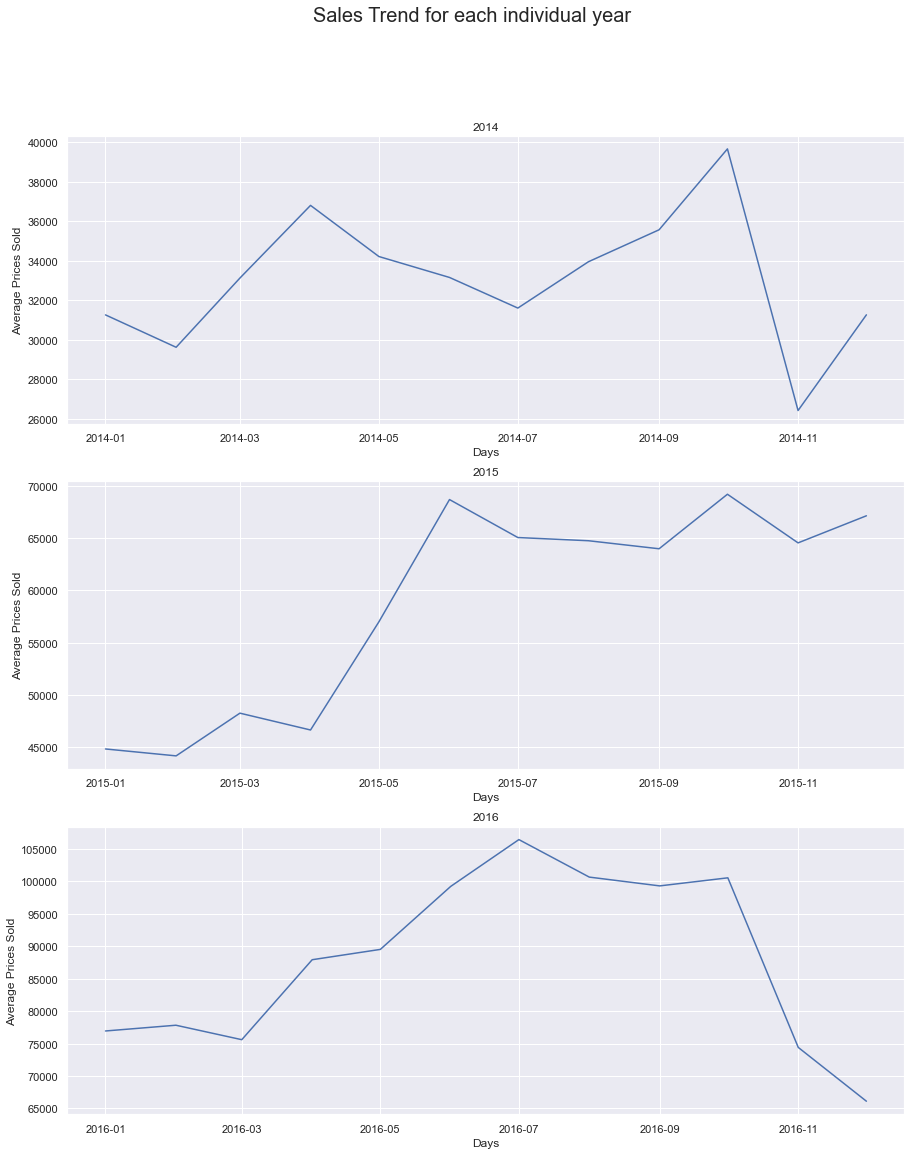

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 18))
fig.suptitle('Sales Trend for each individual year', fontsize=20)

ax1.plot(four.groupby('DATE').SalePrice.sum())
ax1.set(xlabel='Days', ylabel='Average Prices Sold')
ax1.title.set_text('2014')

ax2.plot(five.groupby('DATE').SalePrice.sum())
ax2.set(xlabel='Days', ylabel='Average Prices Sold')
ax2.title.set_text('2015')

ax3.plot(six.groupby('DATE').SalePrice.sum())
ax3.set(xlabel='Days', ylabel='Average Prices Sold')
ax3.title.set_text('2016')
plt.show()

Split the data into Male And Female due to the difference in shoe sizes between Male and Female shoe sizes. i.e. A  emale's size 9 would be equivalent to a man's size 10.5 and would affect future analysis.

In [19]:
#Group the data into male and female.
female = df2.groupby('Gender').get_group('Female')
male = df2.groupby('Gender').get_group('Male')

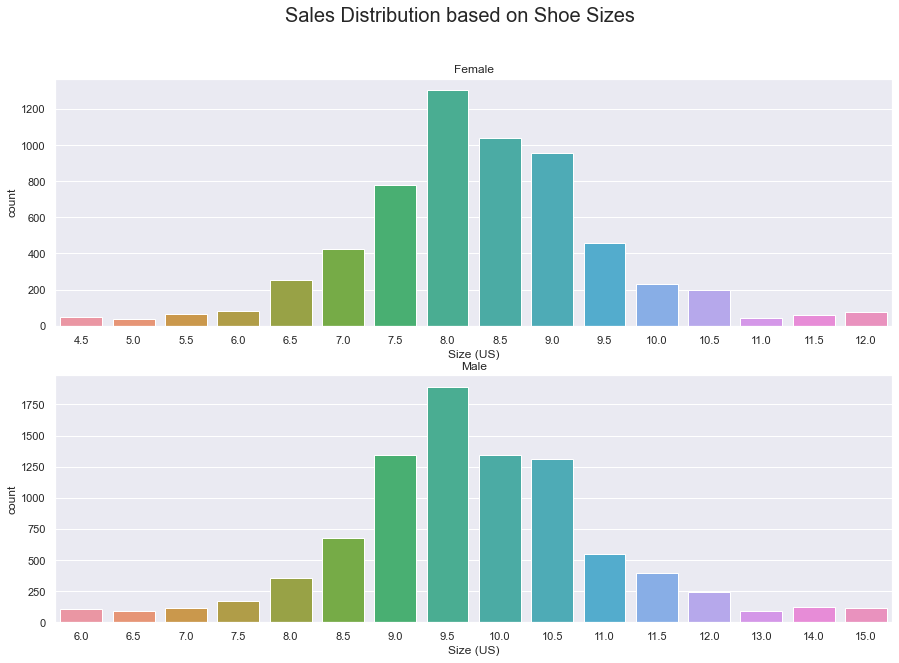

In [20]:
# Create a Plot showing the sales distribution for both Male and Female shoe sizes
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
fig.suptitle('Sales Distribution based on Shoe Sizes', fontsize=20)

sns.countplot(x='Size (US)', data=female, ax=ax1)
ax1.title.set_text('Female')
sns.countplot(x='Size (US)', data=male, ax=ax2)
ax2.title.set_text('Male')
plt.show()

Female:
1. Sizes 8, 8.5, 9.5 and 8.5 tend to be the most sold female pairs of shoes. Therefore, more production of shoes within this size ranges would be ideal.
2. Sizes 4.5, 5.0, 5.5, 6.0 which are extremely small sizes and 11 upwards which are large sizes and are uncommon amongst female shoe sizes should have less produced in other not to have pairs just stuck in the stores with no one to buy them as turnout in sales for these sizes were very low with less than a 100 pairs sold on average.

Male:
1. Sizes 6.0, 6.5, 7.0, 7.5, 13.0, 14.0 and 15.0 are rare sizes for men and should have little of these sizes produced as their turnout in sales were actually very low. 
2. On the other hand, sizes 9.5 which had over 1800 pairs sold and seem to be high demand along with sizes 9.0, 10.0 and 10.5 having an average roughly around 1300 should be produced more. 

#### <b>Each Shop's General Sales Performance In Male and Female Shoes<b>

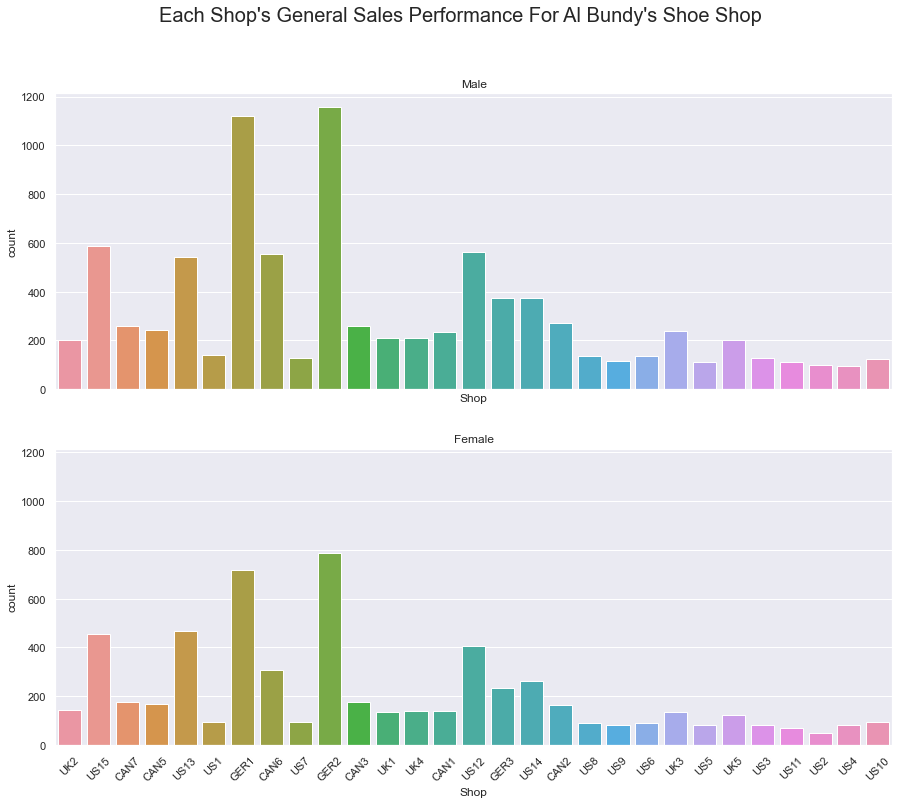

In [21]:
#Create a plot to show how each shop performed in sales for Mlae and Female shoes.
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12), sharey=True, sharex=True)
fig.suptitle('Each Shop\'s General Sales Performance For Al Bundy\'s Shoe Shop', fontsize=20)
order = male.Shop.unique()
sns.countplot(x='Shop', data=male, ax=ax1, order=order)
ax1.title.set_text('Male')
plt.xticks(rotation=45)

sns.countplot(x='Shop', data=female, ax=ax2, order=order)
ax2.title.set_text('Female')
plt.xticks(rotation=45)

plt.show()

#### <b>Segmentation Of Stores based on overall sales(Cluster Analysis)<b>

In [22]:
# Create a new dataframe containing just the shops and total amount of sales made by each shop.
data=df2.groupby('Shop').SalePrice.sum() 
classes = pd.DataFrame(list(data.items()),
                       columns=['Shop', 'Total Sales']).sort_values(by='Total Sales', ascending=False)
classes = classes.reset_index(drop=True)

In [23]:
#Import the relevant libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [24]:
#Encode the Categorical variable.
encoded = LabelEncoder().fit_transform(classes['Shop'])
classes['encoded shops'] = encoded
classes.head()

,Shop,Total Sales,encoded shops
0,GER2,278739.9,7
1,GER1,262665.9,6
2,US15,152703.9,20
3,US13,146398.8,18
4,US12,140107.8,17


In [25]:
#Select the needed features.
x = classes[['encoded shops', 'Total Sales']]
x.head(4)

,encoded shops,Total Sales
0,7,278739.9
1,6,262665.9
2,20,152703.9
3,18,146398.8


In [26]:
#Fit the data with the required number of clusters
kmeans = KMeans(3, random_state=13)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=13)

In [27]:
#Generate the clusters
clusters = kmeans.fit_predict(x)
classes['clusters'] = clusters
classes.head()

,Shop,Total Sales,encoded shops,clusters
0,GER2,278739.9,7,2
1,GER1,262665.9,6,2
2,US15,152703.9,20,1
3,US13,146398.8,18,1
4,US12,140107.8,17,1


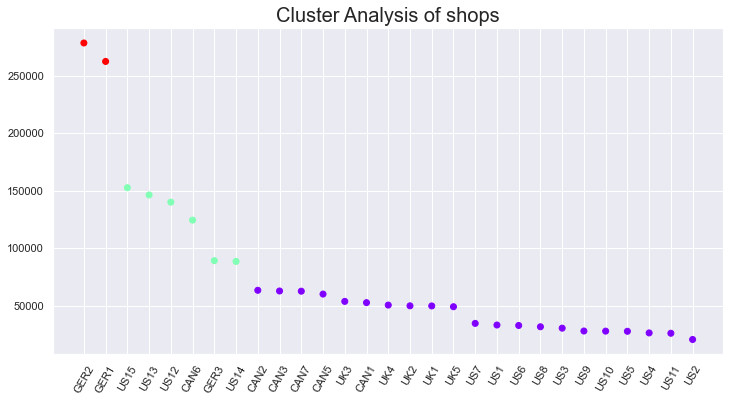

In [28]:
#Visualize the clusters
plt.figure(figsize=(12,6))
plt.scatter(classes['Shop'], classes['Total Sales'], c=classes['clusters'], cmap='rainbow')
plt.xticks(rotation=60)
plt.title('Cluster Analysis of shops', fontsize=20)
plt.show()

###### Group the shops based on number of clusters.

In [29]:
cluster1 = classes.groupby('clusters').get_group(2)
cluster3 = classes.groupby('clusters').get_group(0)
cluster2 = classes.groupby('clusters').get_group(1)

In [30]:
print('The shops in cluster1:')
for i in cluster1['Shop']:
    print(i)

The shops in cluster1:
GER2
GER1


In [31]:
print('The shops in cluster2:')
for j in cluster2['Shop']:
    print(j)

The shops in cluster2:
US15
US13
US12
CAN6
GER3
US14


In [32]:
print('The shops in cluster3:')
for k in cluster3['Shop']:
    print(k)

The shops in cluster3:
CAN2
CAN3
CAN7
CAN5
UK3
CAN1
UK4
UK2
UK1
UK5
US7
US1
US6
US8
US3
US9
US10
US5
US4
US11
US2


In [33]:
#Find the best and least performing shoes by ID in both for male and female shoes.
n = 1
maxmale = male['ProductID'].value_counts()[:n].sort_values(ascending=False)
minmale = male['ProductID'].value_counts()[-n:].sort_values(ascending=False)
maxfemale = female['ProductID'].value_counts()[:n].sort_values(ascending=False)
minfemale = female['ProductID'].value_counts()[-n:].sort_values(ascending=False)

In [34]:
print(f'The most sold pair of male shoes has the ID number {maxmale.keys()[0]}, has about {maxmale.values[0]} pairs sold.') 
#Most popular male pair of shoes sold by ID number.

The most sold pair of male shoes has the ID number 2192, has about 135 pairs sold.


In [35]:
print(f'The most sold pair of female shoes the ID number {maxfemale.keys()[0]}, has about {maxfemale.keys()[0]} pairs.') 
#Most popular female pair of shoes sold by ID number.

The most sold pair of female shoes the ID number 2239, has about 2239 pairs.


In [36]:
print(f'The least sold pair of male shoes has the ID number {minmale.keys()[0]}, has about {minmale.values[0]} pairs sold.') 
#Least sold female pair of shoes by ID number.

The least sold pair of male shoes has the ID number 2170, has about 57 pairs sold.


In [38]:
print(f'The most sold pair of female shoes the ID number {minfemale.keys()[0]}, has about {minfemale.values[0]} pairs.') 
 #Least sold female pair of shoes sold by ID number.

The most sold pair of female shoes the ID number 2164, has about 33 pairs.
